In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [4]:
# 4 CPUs
file = '/home/yongha/mcwa/1DFreeFormDQN/experiments/DQN/2022_09_16_14_07_47/wl900.0_angle60.0_ncells64/comp_table.csv'
df = pd.read_csv(file)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.describe()

,reti-1,reti0,reti+1,mcwat-1,mcwat0,mcwat+1,mcwas-1,mcwas0,mcwas+1,t_reti,tpr_reti,t_mcwat,tpr_mcwat,t_mcwas,tpr_mcwas
count,608609.000000,6.086090e+05,608609.000000,608609.000000,6.086090e+05,608609.000000,608609.000000,6.086090e+05,608609.000000,608609.000000,608609.000000,608609.000000,608609.000000,608609.000000,608609.000000
mean,0.126804,4.578344e-01,0.235288,0.126996,4.570581e-01,0.235501,0.126996,4.570581e-01,0.235501,0.138211,0.238614,0.024074,0.084647,0.038791,0.154944
std,0.121978,3.324059e-01,0.243418,0.122085,3.320994e-01,0.243354,0.122085,3.320994e-01,0.243354,0.027136,0.124969,0.004540,0.017736,0.009043,0.036032
min,0.000000,1.768111e-07,0.000000,0.000000,1.826128e-07,0.000000,0.000000,1.826128e-07,0.000000,0.106503,0.001686,0.012113,0.041964,0.031588,0.126286
25%,0.034155,1.249704e-01,0.049999,0.034261,1.246108e-01,0.050159,0.034261,1.246108e-01,0.050159,0.123665,0.149388,0.021382,0.073447,0.032864,0.131376
50%,0.088853,4.421429e-01,0.145052,0.089048,4.405023e-01,0.145436,0.089048,4.405023e-01,0.145436,0.125269,0.324188,0.022774,0.078817,0.033321,0.133198
75%,0.184268,7.891907e-01,0.338785,0.184561,7.879953e-01,0.339122,0.184561,7.879953e-01,0.339122,0.136313,0.328138,0.024308,0.084765,0.041600,0.165721
max,0.955434,9.989689e-01,0.989897,0.954781,9.990001e-01,0.989790,0.954781,9.990001e-01,0.989790,0.505572,0.343524,0.072359,0.236092,0.118583,0.410744


# TMM to reticolo

In [6]:
A, B = 'mcwat', 'reti'

In [7]:
df['gap-1'] = df[f'{A}-1'] - df[f'{B}-1']
df['gap0'] = df[f'{A}0'] - df[f'{B}0']
df['gap+1'] = df[f'{A}+1'] - df[f'{B}+1']
df['t_gap'] = df[f't_{A}'] - df[f't_{B}']
df['tpr_gap'] = df[f'tpr_{A}'] - df[f'tpr_{B}']

# Benchmark

## difference in transmittance

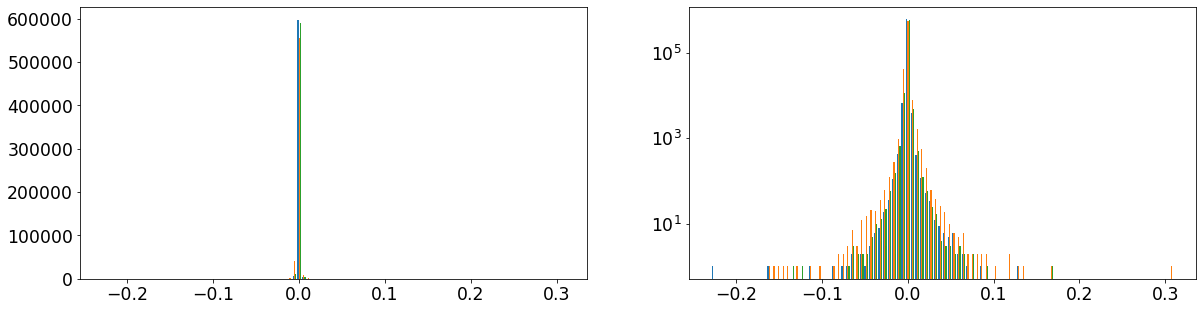

In [8]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].set_yscale('log')
plt.show()

In [9]:
df[['gap-1','gap0','gap+1']].describe().T

,count,mean,std,min,25%,50%,75%,max
gap-1,608609.0,0.000192,0.001232,-0.228532,-0.000074,0.000183,0.000546,0.127314
gap0,608609.0,-0.000776,0.002054,-0.163046,-0.001501,-0.000760,-0.000187,0.309667
gap+1,608609.0,0.000214,0.001351,-0.135228,-0.000011,0.000229,0.000638,0.167910


In [10]:
pd.concat([df['gap-1'], df['gap0'], df['gap+1']]).describe()

count    1.825827e+06
mean    -1.235426e-04
std      1.653576e-03
min     -2.285318e-01
25%     -6.400461e-04
50%      4.427665e-05
75%      4.426475e-04
max      3.096669e-01
dtype: float64

In [28]:
a=pd.concat([df['gap-1'], df['gap0'], df['gap+1']])
cut = 0.005
b=a[abs(a) < cut]
b.count()/a.count() *100

99.04947182838242

In [12]:
df[abs(df['gap-1'])>cut][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,reti-1,gap-1
480529,0.094510,0.323042,-0.228532
42308,0.092712,0.252867,-0.160155
366731,0.148927,0.260372,-0.111446
567410,0.281742,0.367697,-0.085956
406805,0.196346,0.271126,-0.074780
...,...,...,...
346430,0.444971,0.382783,0.062188
319463,0.090466,0.027256,0.063209
145225,0.463249,0.393278,0.069971
496101,0.422662,0.334733,0.087930


In [13]:
df[abs(df['gap0'])>cut][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,reti0,gap0
384373,0.481271,0.644317,-0.163046
220106,0.364626,0.518056,-0.153430
214278,0.299640,0.451038,-0.151398
173898,0.183208,0.330409,-0.147201
78914,0.410306,0.552522,-0.142217
...,...,...,...
42140,0.425227,0.305553,0.119674
478509,0.291000,0.163725,0.127275
406805,0.364522,0.227963,0.136558
366731,0.381150,0.212253,0.168897


In [14]:
df[abs(df['gap+1'])>cut][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,reti+1,gap+1
419167,0.219235,0.354463,-0.135228
42308,0.106590,0.232044,-0.125454
145225,0.181995,0.254182,-0.072186
513333,0.303447,0.369786,-0.066338
520885,0.294091,0.357196,-0.063105
...,...,...,...
98752,0.113956,0.049898,0.064059
208066,0.111853,0.037305,0.074548
240597,0.401517,0.326221,0.075296
478509,0.157208,0.066974,0.090234


## Normalized abs(difference in transmittance) 

In [15]:
cut = 0.01

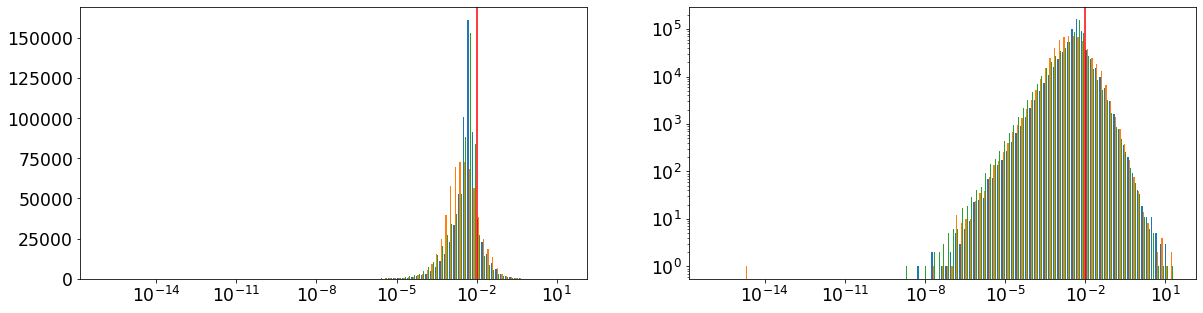

In [16]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(cut, c='r')
axes[1].axvline(cut, c='r')

axes[0].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[0].set_xscale('log')

axes[1].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.show()

right side of vertical red line: normalized error >= 1 %

orange is 0th order

In [17]:
df[abs(df['gap-1']/df[f'{A}-1'])>cut][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,reti-1,gap-1
480529,0.094510,0.323042,-0.228532
42308,0.092712,0.252867,-0.160155
366731,0.148927,0.260372,-0.111446
567410,0.281742,0.367697,-0.085956
406805,0.196346,0.271126,-0.074780
...,...,...,...
346430,0.444971,0.382783,0.062188
319463,0.090466,0.027256,0.063209
145225,0.463249,0.393278,0.069971
496101,0.422662,0.334733,0.087930


In [18]:
df[abs(df['gap0']/df[f'{A}0'])>cut][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,reti0,gap0
384373,0.481271,0.644317,-0.163046
220106,0.364626,0.518056,-0.153430
214278,0.299640,0.451038,-0.151398
173898,0.183208,0.330409,-0.147201
78914,0.410306,0.552522,-0.142217
...,...,...,...
42140,0.425227,0.305553,0.119674
478509,0.291000,0.163725,0.127275
406805,0.364522,0.227963,0.136558
366731,0.381150,0.212253,0.168897


In [19]:
df[abs(df['gap+1']/df[f'{A}+1'])>cut][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,reti+1,gap+1
419167,0.219235,0.354463,-0.135228
42308,0.106590,0.232044,-0.125454
145225,0.181995,0.254182,-0.072186
513333,0.303447,0.369786,-0.066338
520885,0.294091,0.357196,-0.063105
...,...,...,...
98752,0.113956,0.049898,0.064059
208066,0.111853,0.037305,0.074548
240597,0.401517,0.326221,0.075296
478509,0.157208,0.066974,0.090234


# benchmark - simulation time

## run time by time.time()

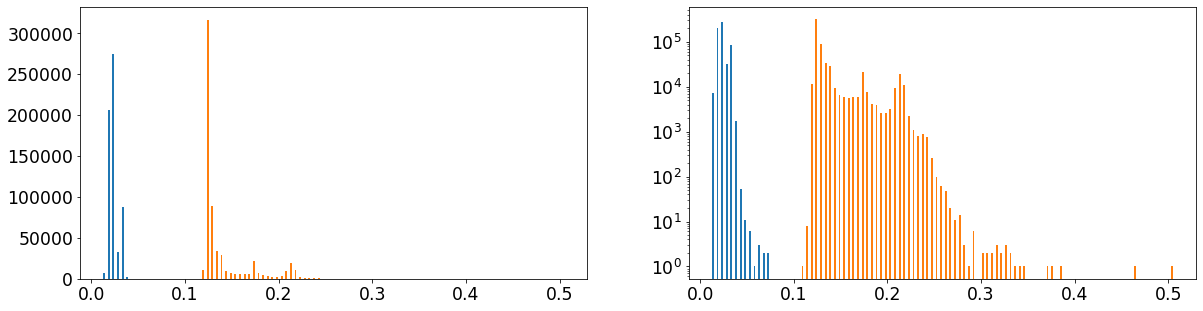

In [20]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f't_{A}'],df[f't_{B}']], bins=100)
axes[1].hist([df[f't_{A}'],df[f't_{B}']], bins=100, log=True)
plt.show()

Blue is  meent-TMM, Oragne is reticolo with octave

## reticolo time / meent time

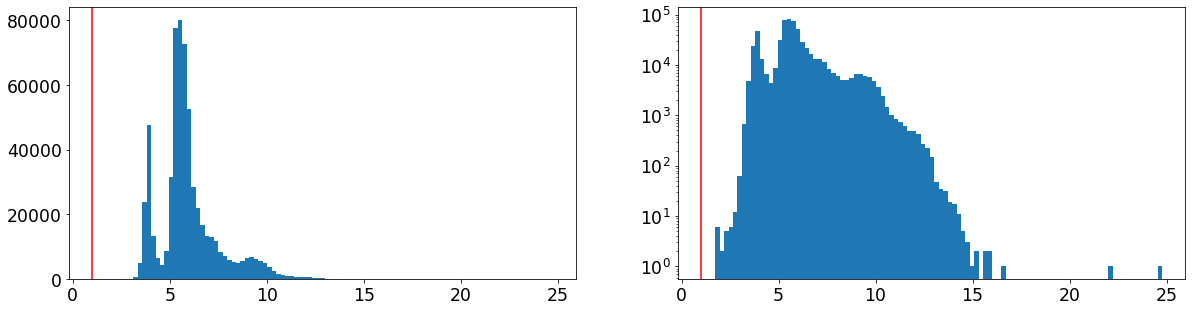

In [21]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [22]:
pd.DataFrame((df[f't_{B}']/df[f't_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,608609.0,5.921889,1.533199,1.727486,5.224651,5.660964,6.373768,24.769837


meent-TMM is faster 5.7 times than reticolo.

right side of red line: TMM is faster

## time.process_time()

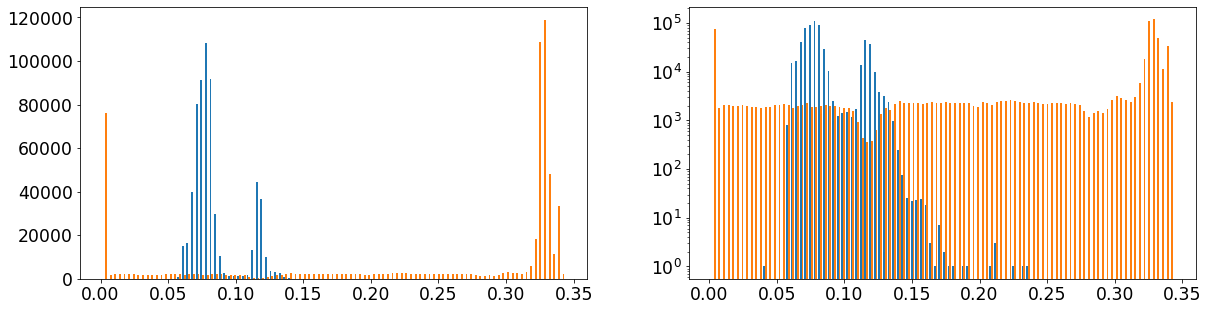

In [23]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100)
axes[1].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100, log=True)
plt.show()

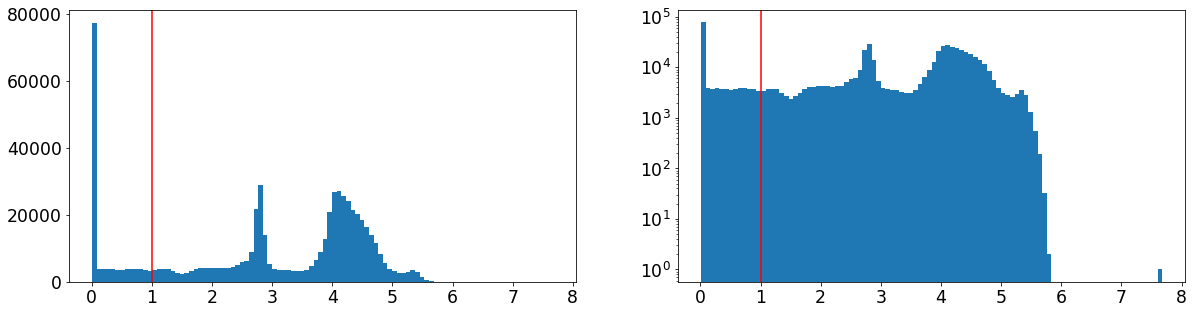

In [24]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [25]:
pd.DataFrame((df[f'tpr_{B}']/df[f'tpr_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,608609.0,2.929905,1.646764,0.009937,1.728631,3.438433,4.262212,7.676966


hard to tell...